# Netflix EDA
## Done by: Yann
#### Dataset available at: https://kaggle.com/shivamb/netflix-shows

####    

# Import Data and Libraries

In [44]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data_import = pd.read_csv(r"C:\Users\Rachel Kuek\OneDrive\Desktop\netflix_titles.csv")
data_import

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

# EDA

In [3]:
data_import.dtypes

# Date is not imported as Date datatype

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
# Now we want to change the 'date_added' column to Date datatype

data_import = pd.read_csv(r"C:\Users\Rachel Kuek\OneDrive\Desktop\netflix_titles.csv")
data_import['date_added'] = pd.to_datetime(data_import['date_added'])

# Now the 'date_added' column is converted to datetime datatype


In [7]:
# Check updated datatypes
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

# Statistics Summary

In [8]:
data_import.describe()

# We can see that the oldest movie/tv show is released in 1925

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

# Date Analysis

##### Create Histogram for 'release_year'

<AxesSubplot:>

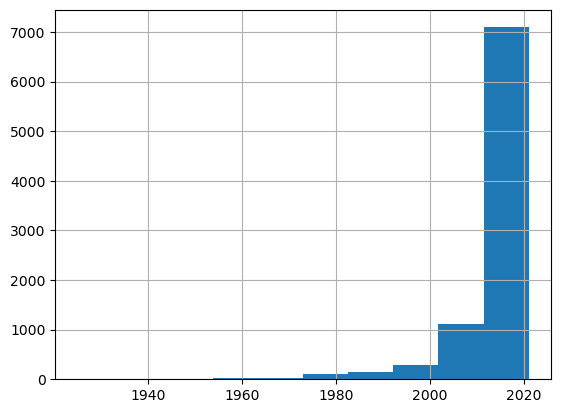

In [10]:
data_import['release_year'].hist()  # MatplotLib version

In [18]:
# Plotly Version (Interactive)
fig = px.histogram(data_import, x='release_year')
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.show()

#### What is the 1925 Film ?

In [19]:
data_import[data_import['release_year'] == 1925]

show_id     type                              title director cast  \
4250   s4251  TV Show  Pioneers: First Women Filmmakers*      NaN  NaN   

     country date_added  release_year rating  duration listed_in  \
4250     NaN 2018-12-30          1925  TV-14  1 Season  TV Shows   

                                            description  
4250  This collection restores films from women who ...

In [21]:
pd.set_option('display.max_colwidth', None)  # This line transforms the truncated version to show the full description
data_import[data_import['release_year'] == 1925]['description']

4250    This collection restores films from women who tackled hot-button issues, transcended norms, and left a mark on the history of cinema and the industry.
Name: description, dtype: object

##### Create Histogram for 'date_added' to Netflix

In [48]:
data_import['date_added'].hist()  # MatplotLib version

<AxesSubplot:>

In [33]:
# Extract Month from date_added
data_import['date_added_month'] = data_import['date_added'].dt.month

# Extract Day from date_added
data_import['date_added_day'] = data_import['date_added'].dt.day

In [40]:
# Plotly Version (Interactive)
fig = px.histogram(data_import, x='date_added_month', color='date_added_month', facet_col='type')

fig.show()

# Seems like Netflix adds more Movies than TV shows

#### Which day do they tend to add the movies/tv shows to Netflix ?

In [41]:
# Plotly Version (Interactive)
fig = px.histogram(data_import, x='date_added_day', color="date_added_day", facet_col='type')

fig.show()

# According to the plot, they usually add it on the first day of the month

# String Column Analysis

In [37]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_month', 'date_added_day'],
      dtype='object')

In [38]:
# What type are there in Netflix ?
data_import['type'].unique()    

array(['Movie', 'TV Show'], dtype=object)

In [42]:
data_import['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [49]:
data_import['country'].str.split("," , expand=True)

0     1     2     3     4     5     6     7     8     9   \
0     United States  None  None  None  None  None  None  None  None  None   
1      South Africa  None  None  None  None  None  None  None  None  None   
2               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4             India  None  None  None  None  None  None  None  None  None   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8802  United States  None  None  None  None  None  None  None  None  None   
8803            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8804  United States  None  None  None  None  None  None  None  None  None   
8805  United States  None  None  None  None  None  None  None  None  None   
8806          India  None  None  None  None  None  None  None  None  None   

        10    11  
0     None  None  
1     None  None  
2      NaN   NaN  
3      NaN   NaN  
4     None  None  
...    ...   ...  
8802  None  None  
8803   NaN   NaN  
8804  None  None  
8805  None  None  
8806  None  None  

[8807 rows x 12 columns]

In [64]:
country_count = data_import.copy()
country_count = pd.concat([country_count, data_import['country'].str.split(',', expand=True)], axis=1)

# Melt the DataFrame. Melting means unpivoting (stick the columns with rows)
melted_data = country_count.melt(id_vars=['type', 'title'], value_vars=range(12), value_name='Country')

# Remove any spaces in the text
melted_data['Country'] = melted_data['Country'].str.strip()

# Drop rows with NaN or None values
melted_data = melted_data.dropna()

# Drop column 'variable' since its redundant
melted_data = melted_data.drop('variable', axis=1)  # axis=1 means I want to drop the entire column

melted_data

type                          title         Country
0         Movie           Dick Johnson Is Dead   United States
1       TV Show                  Blood & Water    South Africa
4       TV Show                   Kota Factory           India
7         Movie                        Sankofa   United States
8       TV Show  The Great British Baking Show  United Kingdom
...         ...                            ...             ...
78859     Movie            The Look of Silence         Germany
85496     Movie                       Barbecue          Sweden
87666     Movie            The Look of Silence     Netherlands
94303     Movie                       Barbecue   United States
103110    Movie                       Barbecue         Uruguay

[10019 rows x 3 columns]

#### Bar chart with country

In [68]:
# Create the histogram plot
fig = px.histogram(melted_data, x='Country', color='type')

# Sort the bars in descending order based on count
fig.update_xaxes(categoryorder='total descending')

fig.show()


# I've noticed there are 2 'United States'
# This is because of spacing problem. One is 'United States' and the other is ' United States'
# We need to fix this by stripping

# # Remove any spaces in the text
# melted_data['Country'] = melted_data['Country'].str.strip()

#### Rating

In [69]:
data_import['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [75]:
# Define the values to be removed
values_to_remove = ['74 min', '84 min', '66 min']

# Remove the specified values
data_filtered = data_import[~data_import['rating'].isin(values_to_remove)]

In [79]:
data_filtered['rating'].hist() # MatplotLib version

<AxesSubplot:>

In [78]:

# Plotly Version
fig = px.histogram(data_filtered, x='rating')

# Sort the bars in descending order based on count
fig.update_xaxes(categoryorder='total descending')

fig.show()

#### Cast count

In [95]:
data_import['Cast Count'] = data_import['cast'].str.split(",")
data_import = data_import[data_import['Cast Count'].notna()]
data_import['Cast Count'] = data_import['Cast Count'].apply(lambda x: len(x))
data_import.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                                                                                                                                                                                                                                                                              cast  \
0                                                                                                                                                                                                                                                                                                              nan   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2                                                                                                                                                              Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera   
3                                                                                                                                                                                                                                                                                                              nan   
4                                                                                                                                                                                                         Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
2            NaN 2021-09-24          2021  TV-MA   1 Season   
3            NaN 2021-09-24          2021  TV-MA   1 Season   
4          India 2021-09-24          2021  TV-MA  2 Seasons   

                                                       listed_in  \
0                                                  Documentaries   
1                International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3                                         Docuseries, Reality TV   
4         International TV Shows, Romantic TV Shows, TV Comedies   

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1       After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.   
2        To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.   
3       Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.   
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   date_added_month  date

In [98]:
# Plotly Version
fig = px.histogram(data_import, x='Cast Count', color='Cast Count')

# Sort the bars in descending order based on count
fig.update_xaxes(categoryorder='total descending')

fig.show()

# Do note that Count=1 consists of NaN cast rows. That explains the high count.

#

# END OF EDA